<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Online_Retail_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/IIIT-A Internship/OnlineRetail.csv', encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df = df[df['Country']=='United Kingdom']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,09-12-2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,09-12-2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,09-12-2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,09-12-2011 12:49,8.95,13113.0,United Kingdom


In [5]:
df = df[['InvoiceNo','StockCode','Quantity','UnitPrice','InvoiceDate','CustomerID' ]]
df

,InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID
0,536365,85123A,6,2.55,01-12-2010 08:26,17850.0
1,536365,71053,6,3.39,01-12-2010 08:26,17850.0
2,536365,84406B,8,2.75,01-12-2010 08:26,17850.0
3,536365,84029G,6,3.39,01-12-2010 08:26,17850.0
4,536365,84029E,6,3.39,01-12-2010 08:26,17850.0
...,...,...,...,...,...,...
541889,581585,22466,12,1.95,09-12-2011 12:31,15804.0
541890,581586,22061,8,2.95,09-12-2011 12:49,13113.0
541891,581586,23275,24,1.25,09-12-2011 12:49,13113.0
541892,581586,21217,24,8.95,09-12-2011 12:49,13113.0


In [6]:
df['Amount'] = df.values[:, 2] * df.values[:, 3]
df.drop(['Quantity', 'UnitPrice'],axis=1, inplace=True)
df

<ipython-input-6-1c32b62979e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df.values[:, 2] * df.values[:, 3]
<ipython-input-6-1c32b62979e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Quantity', 'UnitPrice'],axis=1, inplace=True)


,InvoiceNo,StockCode,InvoiceDate,CustomerID,Amount
0,536365,85123A,01-12-2010 08:26,17850.0,15.3
1,536365,71053,01-12-2010 08:26,17850.0,20.34
2,536365,84406B,01-12-2010 08:26,17850.0,22.0
3,536365,84029G,01-12-2010 08:26,17850.0,20.34
4,536365,84029E,01-12-2010 08:26,17850.0,20.34
...,...,...,...,...,...
541889,581585,22466,09-12-2011 12:31,15804.0,23.4
541890,581586,22061,09-12-2011 12:49,13113.0,23.6
541891,581586,23275,09-12-2011 12:49,13113.0,30.0
541892,581586,21217,09-12-2011 12:49,13113.0,214.8


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=True)
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

df.drop(['InvoiceDate'],axis=1, inplace=True)
df

<ipython-input-7-9190d4e37a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=True)
<ipython-input-7-9190d4e37a79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['InvoiceDate'].dt.date
<ipython-input-7-9190d4e37a79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,InvoiceNo,StockCode,CustomerID,Amount,Date,Time
0,536365,85123A,17850.0,15.3,2010-12-01,08:26:00
1,536365,71053,17850.0,20.34,2010-12-01,08:26:00
2,536365,84406B,17850.0,22.0,2010-12-01,08:26:00
3,536365,84029G,17850.0,20.34,2010-12-01,08:26:00
4,536365,84029E,17850.0,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...
541889,581585,22466,15804.0,23.4,2011-12-09,12:31:00
541890,581586,22061,13113.0,23.6,2011-12-09,12:49:00
541891,581586,23275,13113.0,30.0,2011-12-09,12:49:00
541892,581586,21217,13113.0,214.8,2011-12-09,12:49:00


In [8]:
df = df[df['Amount'] > 0]
#deleting null data
df = df[df['CustomerID'].notnull()]
df

,InvoiceNo,StockCode,CustomerID,Amount,Date,Time
0,536365,85123A,17850.0,15.3,2010-12-01,08:26:00
1,536365,71053,17850.0,20.34,2010-12-01,08:26:00
2,536365,84406B,17850.0,22.0,2010-12-01,08:26:00
3,536365,84029G,17850.0,20.34,2010-12-01,08:26:00
4,536365,84029E,17850.0,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...
541889,581585,22466,15804.0,23.4,2011-12-09,12:31:00
541890,581586,22061,13113.0,23.6,2011-12-09,12:49:00
541891,581586,23275,13113.0,30.0,2011-12-09,12:49:00
541892,581586,21217,13113.0,214.8,2011-12-09,12:49:00


In [9]:
df_recency = df.groupby(by='CustomerID', as_index=False)['Date'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3
...,...,...,...
3915,18280.0,2011-03-07,277
3916,18281.0,2011-06-12,180
3917,18282.0,2011-12-02,7
3918,18283.0,2011-12-06,3


In [10]:
frequency_df = df.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['Date'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4412
3,12749.0,199
4,12820.0,59
...,...,...
3915,18280.0,10
3916,18281.0,7
3917,18282.0,12
3918,18283.0,721


In [11]:
monetary_df = df.groupby(by='CustomerID', as_index=False)['Amount'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df

,CustomerID,Monetary
0,12346.0,77183.6
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3915,18280.0,180.6
3916,18281.0,80.82
3917,18282.0,178.05
3918,18283.0,2094.88


In [12]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(columns='LastPurchaseDate')
rfm_df
df = rfm_df
df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.6
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3915,18280.0,277,10,180.6
3916,18281.0,180,7,80.82
3917,18282.0,7,12,178.05
3918,18283.0,3,721,2094.88


In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['InvoiceNo','Amount']] = scaler.fit_transform(df[['InvoiceNo','Amount']])
# df

In [14]:
def optimise_k_means(data, max_k):
    means = []
    inertias=[]

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #Elbow plot
    plt.subplot()
    plt.plot(means, inertias, 'o-')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

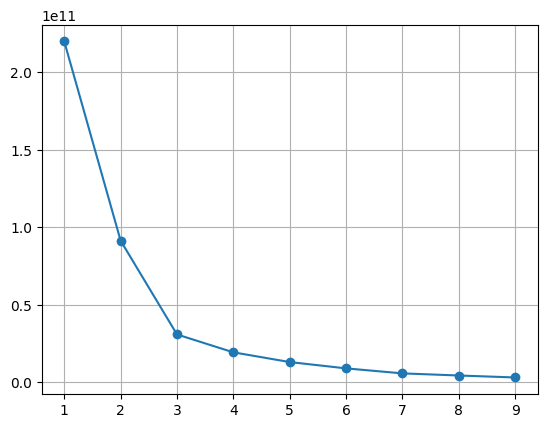

In [15]:
optimise_k_means(df[['Recency','Frequency','Monetary']], 10)

In [21]:
kmeans = KMeans(n_clusters=4)

In [22]:
kmeans.fit(df[['Recency','Frequency','Monetary']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
df['Kmeans_3'] = kmeans.labels_

In [24]:
df

,CustomerID,Recency,Frequency,Monetary,Kmeans_3
0,12346.0,325,1,77183.6,2
1,12747.0,2,103,4196.01,0
2,12748.0,0,4412,33719.73,2
3,12749.0,3,199,4090.88,0
4,12820.0,3,59,942.34,0
...,...,...,...,...,...
3915,18280.0,277,10,180.6,0
3916,18281.0,180,7,80.82,0
3917,18282.0,7,12,178.05,0
3918,18283.0,3,721,2094.88,0


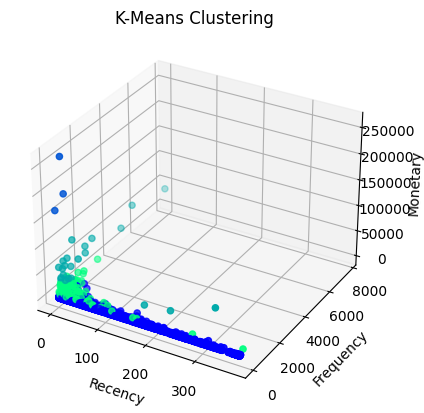

In [33]:
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Recency, df.Frequency, df.Monetary, c=df.Kmeans_3, cmap="winter", marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()